In [ ]:
%pip install -q -U torchgeo[datasets]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.0/849.0 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 25.5 MB/s eta 0:00:00
   

In [ ]:
!pip install -q -U pytorch-lightning

In [ ]:
import torchgeo
from torchgeo.datasets import VHR10
from torchgeo.trainers import ObjectDetectionTask

import torch
from torch.utils.data import DataLoader
import lightning.pytorch as pl

import matplotlib.pyplot as plt

**The VHR-10 dataset, provided by Northwestern Polytechnical University (NWPU) in China, is a Very High Resolution (VHR) remote sensing image dataset encompassing 10 classes.**


Airplanes (757 instances)
Ships (302 instances)
Storage tanks (655 instances)
Baseball diamonds (390 instances)
Tennis courts (524 instances)
Basketball courts (159 instances)
Ground track fields (163 instances)
Harbors (224 instances)
Bridges (124 instances)
Vehicles (477 instances)


In [ ]:
import os, gdown

os.makedirs('data/VHR10/', exist_ok=True)

url = 'https://drive.google.com/uc?id=1--foZ3dV5OCsqXQXT84UeKtrAqc5CkAE'
output_path = 'data/VHR10/NWPU VHR-10 dataset.rar'
gdown.download(url, output_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1--foZ3dV5OCsqXQXT84UeKtrAqc5CkAE
From (redirected): https://drive.google.com/uc?id=1--foZ3dV5OCsqXQXT84UeKtrAqc5CkAE&confirm=t&uuid=f1e510be-9f01-4666-95a7-984af25ddb5e
To: /content/data/VHR10/NWPU VHR-10 dataset.rar
100%|██████████| 76.8M/76.8M [00:01<00:00, 54.3MB/s]


'data/VHR10/NWPU VHR-10 dataset.rar'

In [ ]:
def preprocess(sample):
    sample["image"] = sample["image"].float() / 255.0
    return sample

ds = VHR10(
    root="data/VHR10/",
    split="positive",
    transforms=preprocess,
    download=True,
    checksum=True,
)

100%|██████████| 76.8M/76.8M [00:01<00:00, 42.6MB/s]


Extracting data/VHR10/NWPU VHR-10 dataset.zip to data/VHR10/


100%|██████████| 1.27M/1.27M [00:00<00:00, 6.56MB/s]


loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [ ]:
print(f"VHR-10 dataset: {len(ds)}")

VHR-10 dataset: 650


In [ ]:
ds[0]["image"].shape

torch.Size([3, 808, 958])

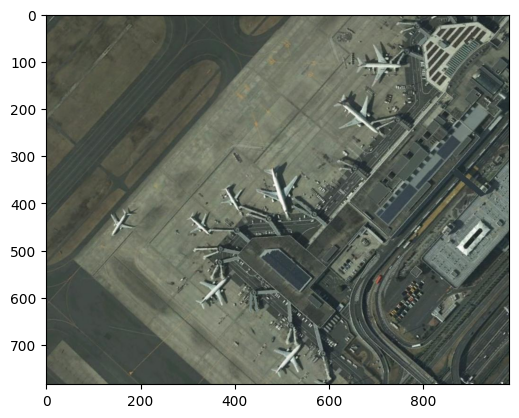

In [ ]:
image = ds[5]["image"].permute(1, 2, 0)
plt.imshow(image)
plt.show()

In [ ]:
ds[5]

{'image': tensor([[[0.2314, 0.2353, 0.2353,  ..., 0.2706, 0.4000, 0.4549],
          [0.2392, 0.2392, 0.2392,  ..., 0.3569, 0.3922, 0.3961],
          [0.2431, 0.2431, 0.2431,  ..., 0.4510, 0.5412, 0.6078],
          ...,
          [0.2471, 0.2431, 0.2392,  ..., 0.2588, 0.2745, 0.2588],
          [0.2510, 0.2471, 0.2431,  ..., 0.2667, 0.2667, 0.2627],
          [0.2549, 0.2510, 0.2431,  ..., 0.2824, 0.2588, 0.2824]],
 
         [[0.2588, 0.2627, 0.2627,  ..., 0.3098, 0.4392, 0.4941],
          [0.2667, 0.2667, 0.2667,  ..., 0.3961, 0.4314, 0.4353],
          [0.2706, 0.2706, 0.2706,  ..., 0.4902, 0.5804, 0.6471],
          ...,
          [0.2745, 0.2706, 0.2667,  ..., 0.2941, 0.3098, 0.2941],
          [0.2784, 0.2745, 0.2706,  ..., 0.3020, 0.3020, 0.2980],
          [0.2824, 0.2784, 0.2706,  ..., 0.3176, 0.2941, 0.3176]],
 
         [[0.2314, 0.2353, 0.2353,  ..., 0.2745, 0.4039, 0.4588],
          [0.2392, 0.2392, 0.2392,  ..., 0.3608, 0.3961, 0.4000],
          [0.2431, 0.2431, 0.24

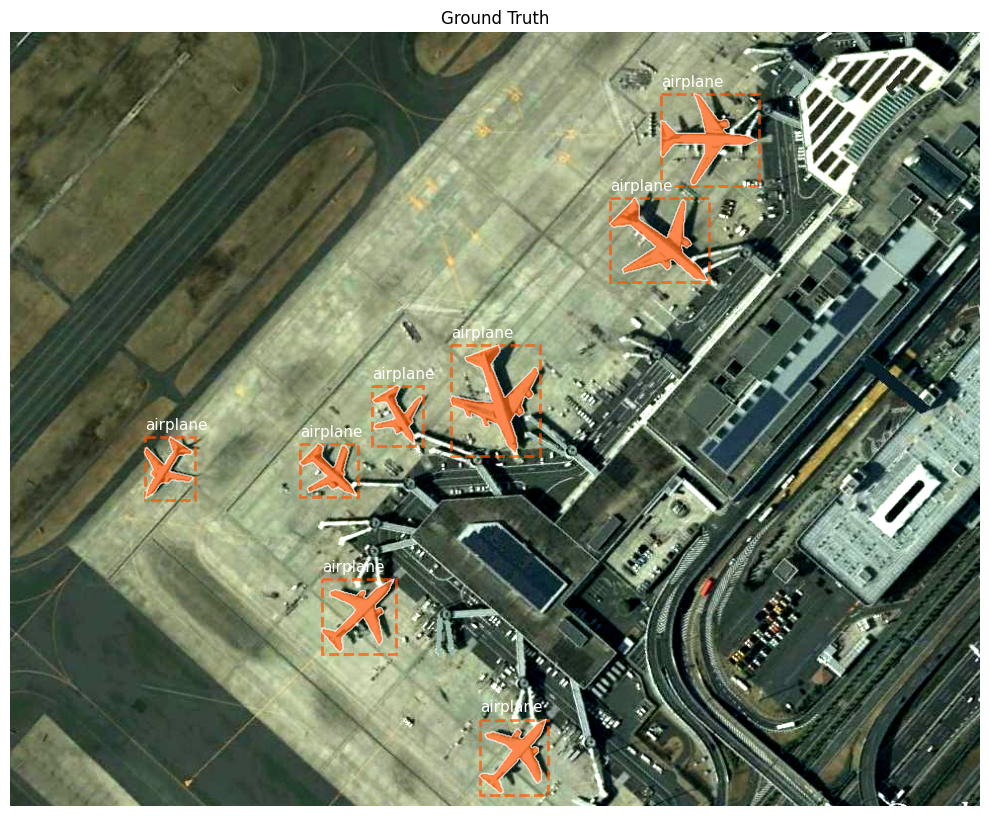

In [ ]:
ds.plot(ds[5])
plt.savefig('ground_truth.png', bbox_inches='tight')
plt.show()

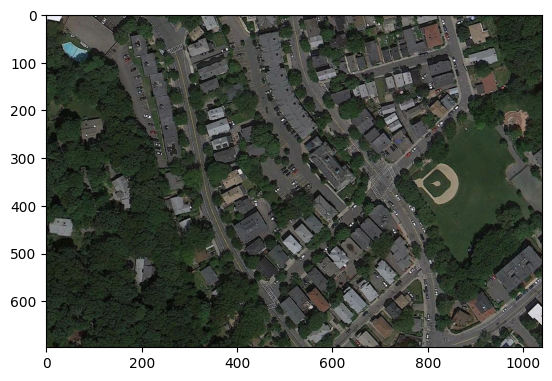

In [ ]:
image = ds[123]["image"].permute(1, 2, 0)
plt.imshow(image)
plt.show()

In [ ]:
def collate_fn(batch):
    new_batch = {
        "image": [item["image"] for item in batch],  # Images
        "boxes": [item["boxes"] for item in batch],  # Bounding boxes
        "labels": [item["labels"] for item in batch],  # Labels
        "masks": [item["masks"] for item in batch],  # Masks
    }
    return new_batch  # Return the new batch

# Data Loader

dl = DataLoader(
    ds,  # Dataset
    batch_size=2,  # Number of data to load at one time
    num_workers=1,  # Number of processes to use for data loading
    shuffle=True,  # Whether to shuffle the dataset before loading
    collate_fn=collate_fn,  # collate_fn function for batch processing
)

In [ ]:
class VariableSizeInputObjectDetectionTask(ObjectDetectionTask):
    # Define the training step
    def training_step(self, batch, batch_idx, dataloader_idx=0):
        x = batch["image"]  # Image
        batch_size = len(x)  # Set batch size (number of images)
        y = [
            {"boxes": batch["boxes"][i], "labels": batch["labels"][i]}
            for i in range(batch_size)
        ] # Extract bounding box and label information for each image
        loss_dict = self(x, y)  # Loss
        train_loss: Tensor = sum(loss_dict.values())  # Training loss (sum of loss values)
        self.log_dict(loss_dict)  # Record loss values
        return train_loss  # Return training loss

task = VariableSizeInputObjectDetectionTask(
    model="retinanet",  # Faster R-CNN model 'faster-rcnn', 'fcos', or 'retinanet'.
    backbone="resnet18",  # ResNet18 neural network architecture
    weights=True,  # Use pretrained weights
    in_channels=3,  # Number of channels in the input image (RGB images)
    num_classes=11,  # Number of classes to classify (10 + background)
    trainable_layers=3,  # Number of trainable layers
    lr=1e-3,  # Learning rate
    patience=10,  # Set the number of patience iterations for early stopping
    freeze_backbone=True,  # Wheter to train with the backbone network weights unfrozen
)
task.monitor = "loss_classifier"  # Set the metric to monitor (here, the classifier's loss) classification

In [ ]:
trainer = pl.Trainer(
    default_root_dir="logs/",  # Set the default directory
    accelerator="cuda",  # Set the type of hardware accelerator for training (using GPU)
    devices=[0],  # List of device IDs to use ([0] means the first GPU)
    min_epochs=6,  # Set the minimum number of training epochs
    max_epochs=10,  # Set the maximum number of training epochs
    log_every_n_steps=20,  # Set how often to log after a number of steps
)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
%%time
# Model training
trainer.fit(task, train_dataloaders=dl)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name         | Type             | Params | Mode 
----------------------------------------------------------
0 | model        | RetinaNet        | 20.6 M | train
1 | val_metrics  | MetricCollection | 0      | train
2 | test_metrics | MetricCollection | 0      | train
----------------------------------------------------------
5.0 M     Trainable params
15.5 M    Non-trainable params
20.6 M    Total params
82.311    Total estimated model params size (MB)
135       Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name         | Type             | Params | Mode 
----------------------------------------------------------
0 | model        | RetinaNet        | 20.6 M | train
1 | val_metrics  | MetricCollection | 0      | train
2 | test_metrics | MetricCollection | 0      | train
--------------------

Training: |          | 0/? [00:00<?, ?it/s]

MisconfigurationException: ReduceLROnPlateau conditioned on metric loss_classifier which is not available. Available metrics are: ['classification', 'bbox_regression']. Condition can be set using `monitor` key in lr scheduler dict

In [ ]:
batch = next(iter(dl))

In [ ]:
model = task.model
model.eval()

with torch.no_grad():
  out = model(batch["image"])

In [ ]:
def create_sample(batch, out, batch_idx):
    return {
        "image": batch["image"][batch_idx],  # Image
        "boxes": batch["boxes"][batch_idx],  # Actual bounding boxes
        "labels": batch["labels"][batch_idx],  # Actual labels
        "masks": batch["masks"][batch_idx],  # Actual masks
        "prediction_labels": out[batch_idx]["labels"],  # Labels predicted by the model
        "prediction_boxes": out[batch_idx]["boxes"],  # Bounding boxes predicted by the model
        "prediction_scores": out[batch_idx]["scores"],  # Confidence scores for each prediction
    }

batch_idx = 1
sample = create_sample(batch, out, batch_idx)

In [ ]:

sample

{'image': tensor([[[0.2157, 0.2275, 0.2431,  ..., 0.5922, 0.5804, 0.5725],
          [0.2353, 0.2471, 0.2588,  ..., 0.6000, 0.6039, 0.5961],
          [0.2667, 0.2745, 0.2824,  ..., 0.6078, 0.6039, 0.5961],
          ...,
          [0.2471, 0.2431, 0.2353,  ..., 0.8745, 0.8235, 0.6353],
          [0.2431, 0.2392, 0.2314,  ..., 0.8706, 0.7882, 0.5490],
          [0.2431, 0.2392, 0.2314,  ..., 0.8510, 0.7216, 0.4863]],
 
         [[0.2118, 0.2235, 0.2392,  ..., 0.6196, 0.6000, 0.5961],
          [0.2314, 0.2431, 0.2549,  ..., 0.6275, 0.6235, 0.6196],
          [0.2667, 0.2745, 0.2824,  ..., 0.6275, 0.6314, 0.6235],
          ...,
          [0.3059, 0.3020, 0.2941,  ..., 0.8863, 0.8353, 0.6549],
          [0.3020, 0.2980, 0.2902,  ..., 0.8824, 0.7961, 0.5686],
          [0.3020, 0.2980, 0.2902,  ..., 0.8627, 0.7294, 0.5059]],
 
         [[0.2314, 0.2431, 0.2588,  ..., 0.5882, 0.5725, 0.5569],
          [0.2510, 0.2627, 0.2745,  ..., 0.6000, 0.5961, 0.5804],
          [0.2745, 0.2824, 0.29

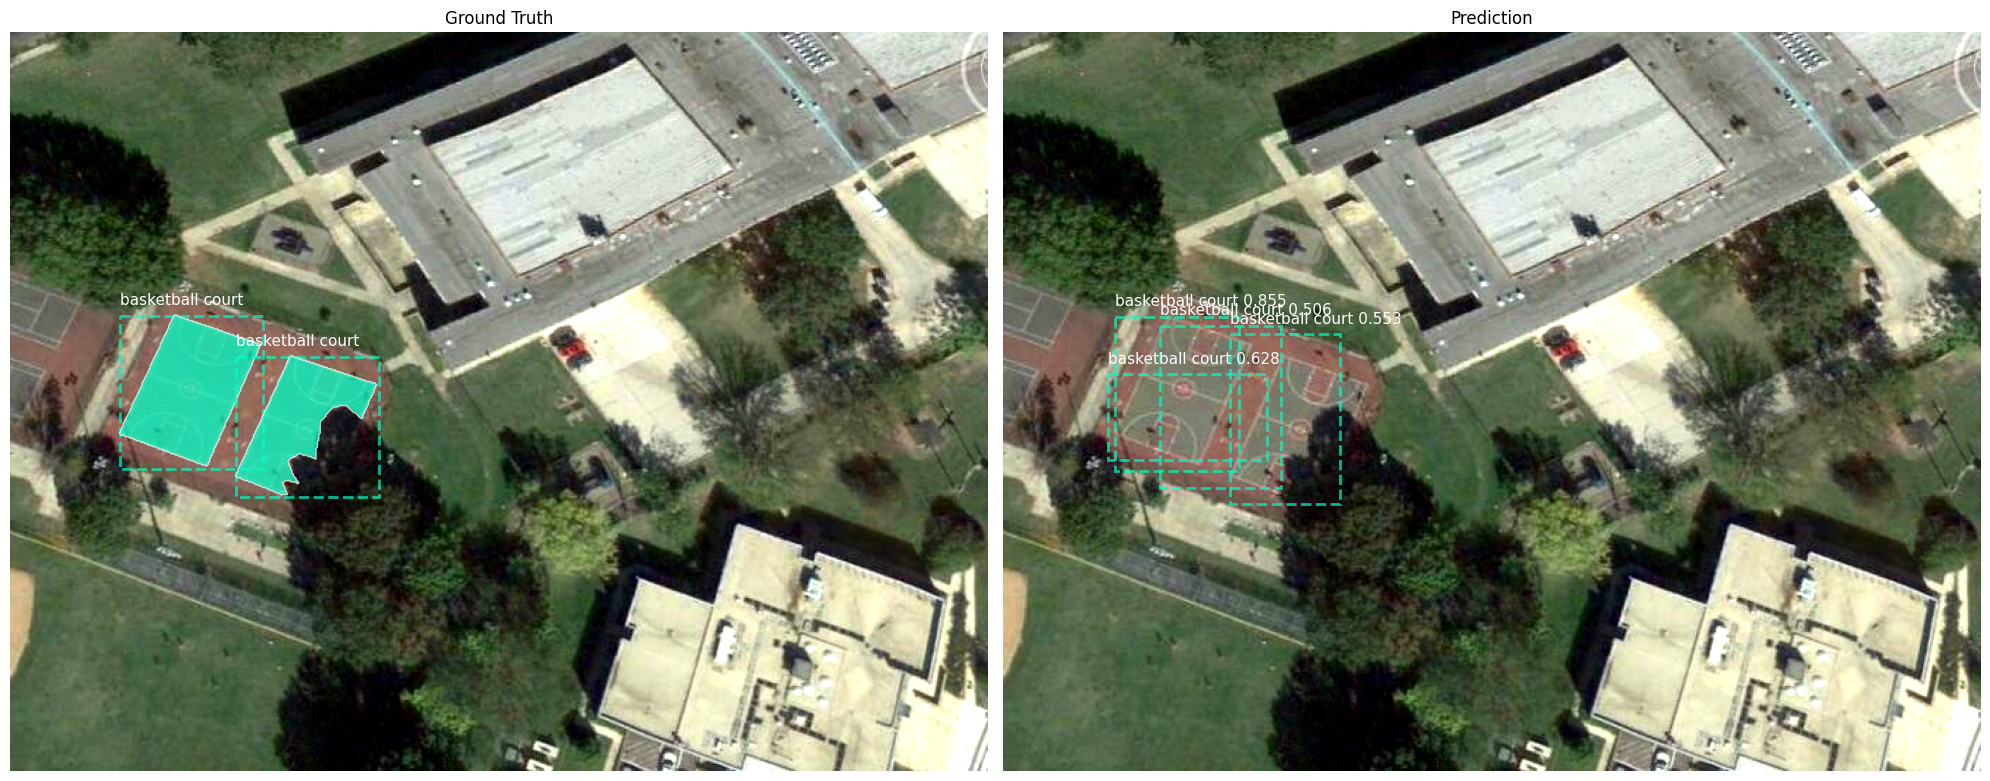

In [ ]:
ds.plot(sample)
plt.savefig('inference.png', bbox_inches='tight')
plt.show()

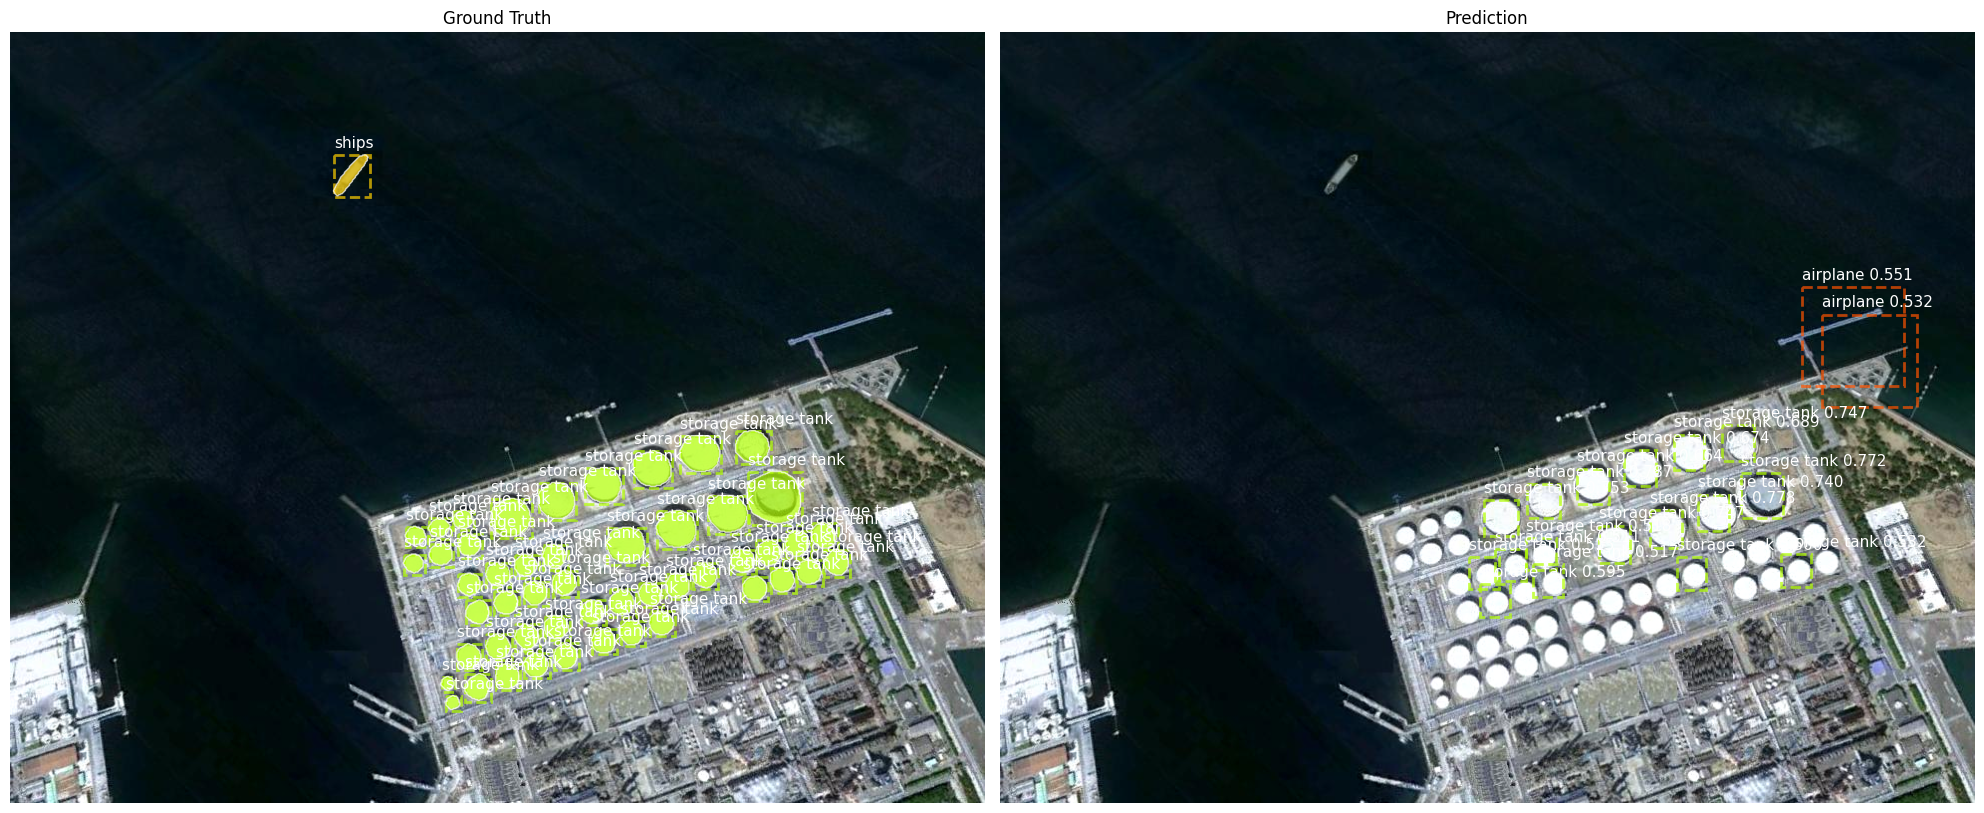

In [ ]:
# Visualizing Sample for Batch Index 3
batch_idx = 3
sample = create_sample(batch, out, batch_idx)

ds.plot(sample)
plt.show()

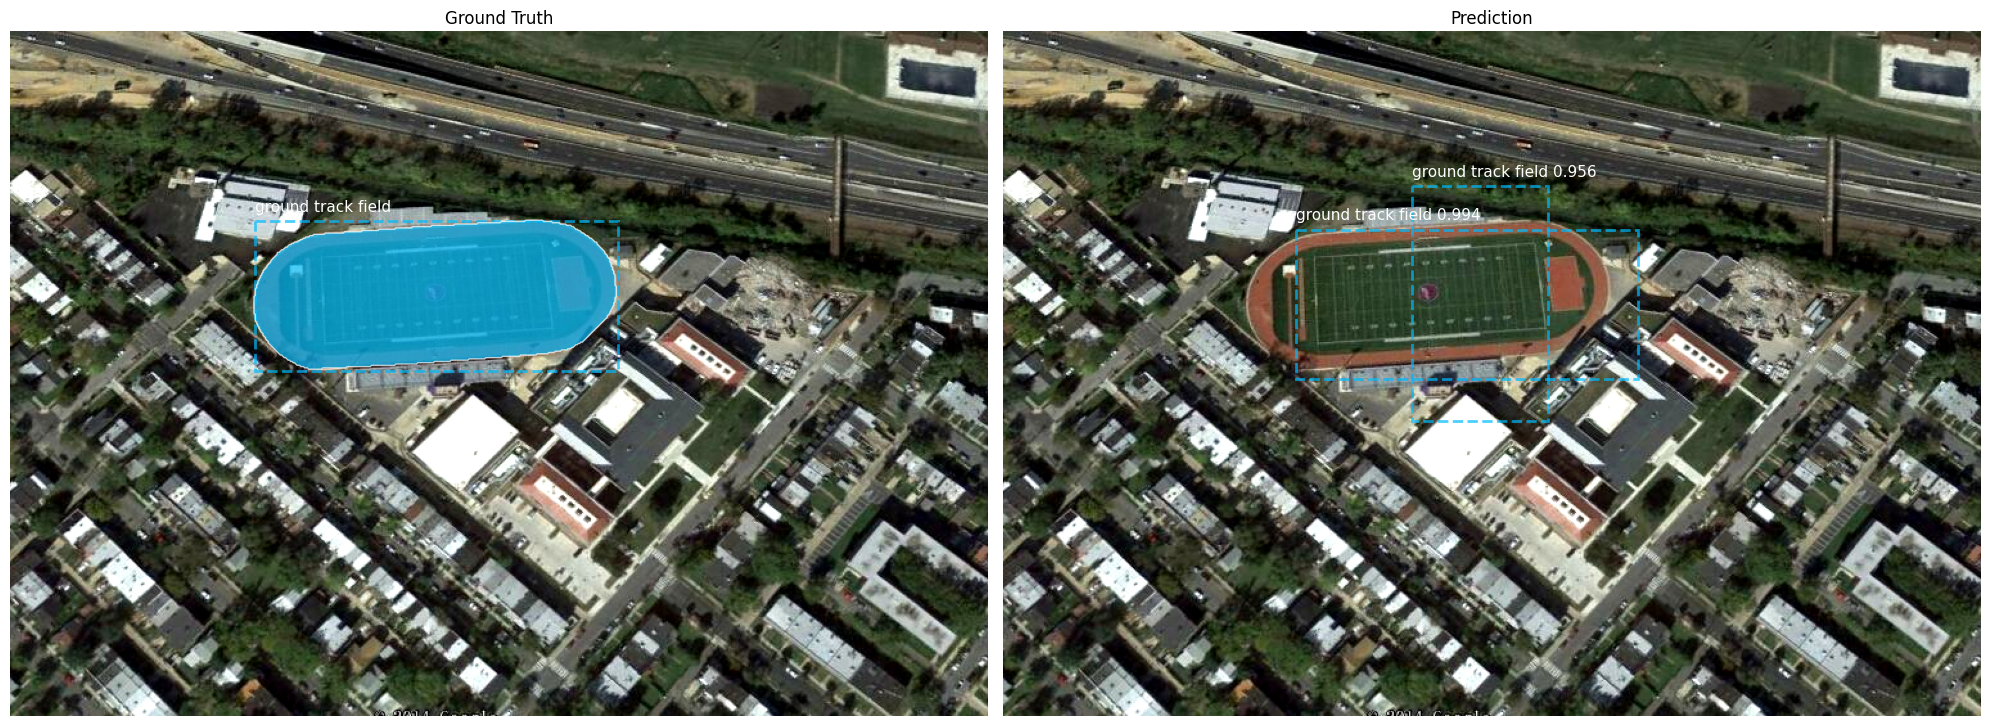

In [ ]:
# Visualizing Sample for Batch Index 5
batch_idx = 5
sample = create_sample(batch, out, batch_idx)

ds.plot(sample)
plt.show()